## Max−Minフィルター

フィルタ内の画素の最大値と最小値の差を出力するフィルタであり、**エッジ検出**のフィルタの一つである。
エッジ検出とは画像内の線を検出るすることであり、このような画像内の情報を抜き出す操作を**特徴抽出**と呼ぶ。
エッジ検出では多くの場合、グレースケール画像に対してフィルタリングを行う。

In [10]:
a = np.array([[[1,2,3],[4,5,6,]],[[7,8,9],[10,11,12]]])
print(a.shape)
np.max(a[0, 1,:])

(2, 2, 3)


6

True

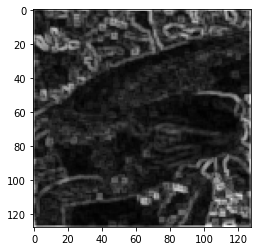

In [15]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

def BGR2GRAY(img, K_size=3):
   
    # グレースケール化
    out = 0.2126*img[:,:,0].copy() + 0.7152*img[:,:,1].copy() + 0.0722*img[:,:,2].copy()
    out = out.astype(np.uint8)
    
    return out

def max_min_filter(img, K_size=3):
    if len(img.shape)==3:
        H, W, C = img.shape
        
        # zero padding
        pad = K_size//2
        out = np.zeros((H+pad*2, W+pad*2, 3), dtype=np.float)
        out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
        tmp = out.copy()
        
        # filtering
        for y in range(H):
            for x in range(W):
                for c in range(C):
                    out[y, x, c] = np.max(tmp[y:y+K_size, x:x+K_size,c]) - np.min(tmp[y:y+K_size, x:x+K_size,c])
                    
        out  = out[:H, :W].astype(np.uint8)
        
    else:
        H, W = img.shape
        
        # zero padding
        pad = K_size//2
        out = np.zeros((H+pad*2, W+pad*2), dtype=np.float)
        out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
        tmp = out.copy()
        
        # filtering
        for y in range(H):
            for x in range(W):
                out[y, x] = np.max(tmp[y:y+K_size, x:x+K_size]) - np.min(tmp[y:y+K_size, x:x+K_size])
                
        out = out[:H, :W].astype(np.uint8)
                
    return out
                
img = cv2.imread('../imori.jpg')
gray = BGR2GRAY(img, K_size=3)
out = max_min_filter(gray)


plt.imshow(out)
plt.imshow(out, cmap='gray')
cv2.imwrite('out13-1.jpg', out)              